# ============================================================
# Assignment: Perceptron & Activation Functions
# ============================================================
---

## Instructions:
- This assignment contains **two parts**.
- Fill in all code and explanation sections where indicated.
- Do NOT use high-level ML libraries like TensorFlow or PyTorch for implementation.
- You may use NumPy, Matplotlib, and scikit-learn for dataset generation and visualization.
---

## Part 1 — Perceptron from Scratch

### Q1. Dataset Preparation
1. Generate a **2D dataset** with 2 classes using `make_blobs` from scikit-learn.
2. Convert labels so that one class is `-1` and the other is `1`.
3. Visualize the dataset using a scatter plot.

**Your Task:**
- Write the code to generate and visualize the dataset.
- Provide the plot in your answer.


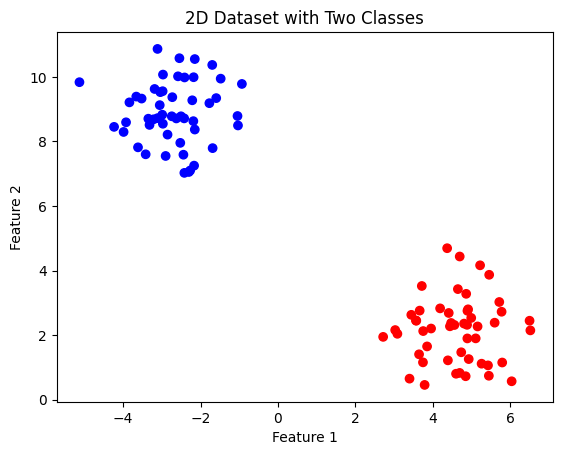

In [1]:
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt
import numpy as np

# Generate 2D dataset
X, y = make_blobs(n_samples=100, centers=2, random_state=42)

# Convert labels to -1 and 1
y = np.where(y == 0, -1, 1)

# Visualize the dataset
plt.scatter(X[:, 0], X[:, 1], c=y, cmap='bwr')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('2D Dataset with Two Classes')
plt.show()

### Q2. Perceptron Implementation
1. Create a Python class `Perceptron` with:
   - `__init__` — initializes learning rate, number of epochs, and weights/bias.
   - `fit(X, y)` — trains the perceptron using the **Perceptron Learning Rule**.
   - `predict(X)` — returns predictions for given input features.
2. Use the update rule:  
$$
w \gets w + \eta (y_i - \hat{y}_i) x_i
$$
3. Train the Perceptron on your dataset.

**Your Task:**
- Implement and train the Perceptron.
- Display the final weights and bias.


In [2]:
class Perceptron:
    def __init__(self, learning_rate=0.01, n_epochs=100):
        self.learning_rate = learning_rate
        self.n_epochs = n_epochs
        self.weights = None
        self.bias = None

    def fit(self, X, y):
        n_samples, n_features = X.shape

        self.weights = np.zeros(n_features)
        self.bias = 0

        for _ in range(self.n_epochs):
            for idx, x_i in enumerate(X):
                linear_output = np.dot(x_i, self.weights) + self.bias
                y_predicted = np.where(linear_output >= 0, 1, -1)

                update = self.learning_rate * (y[idx] - y_predicted)
                self.weights += update * x_i
                self.bias += update

    def predict(self, X):
        linear_output = np.dot(X, self.weights) + self.bias
        return np.where(linear_output >= 0, 1, -1)

In [3]:
perceptron = Perceptron(learning_rate=0.01, n_epochs=100)
perceptron.fit(X, y)

print("Final Weights:", perceptron.weights)
print("Final Bias:", perceptron.bias)

Final Weights: [ 0.17422604 -0.11603311]
Final Bias: 0.0


### Q3. Decision Boundary
1. Write a function to plot the decision boundary of your trained perceptron.
2. Visualize the boundary along with the dataset.

**Your Task:**
- Provide the decision boundary plot.
- Explain in **2–3 sentences** how the perceptron separates the two classes.


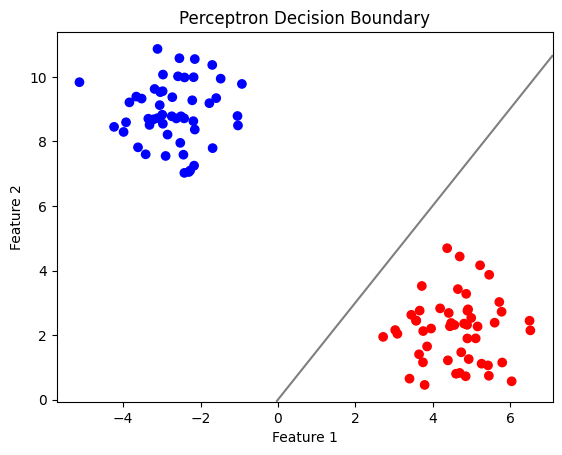

In [4]:
def plot_decision_boundary(X, y, weights, bias):
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap='bwr')
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.title('Perceptron Decision Boundary')

    ax = plt.gca()
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()

    xx = np.linspace(xlim[0], xlim[1], 30)
    yy = np.linspace(ylim[0], ylim[1], 30)
    YY, XX = np.meshgrid(yy, xx)
    xy = np.vstack([XX.ravel(), YY.ravel()]).T
    Z = np.dot(xy, weights) + bias
    Z = Z.reshape(XX.shape)

    ax.contour(XX, YY, Z, colors='k', levels=[0], alpha=0.5,
               linestyles=['-'])
    plt.show()

plot_decision_boundary(X, y, perceptron.weights, perceptron.bias)

**Explanation:**
The output plot shows the decision boundary, which is a line that separates the two classes. The perceptron uses this boundary, determined by its trained weights and bias, to classify new data points: points on one side of the line are classified as one class, and points on the other side are classified as the other class.


## Part 2 — Activation Functions

### Q4. Activation Function Implementation
Implement the following activation functions and their derivatives:
- Sigmoid
- Tanh
- ReLU
- Leaky ReLU
- Softmax

**Your Task:**
- For each activation function:
  - Write the forward pass formula.
  - Write the derivative formula.

**Table: Activation Function Formulas & Derivatives**
| Function   | Formula | Derivative |
|------------|---------|------------|
| Sigmoid    |         |            |
| Tanh       |         |            |
| ReLU       |         |            |
| Leaky ReLU |         |            |
| Softmax    |         |            |


In [1]:
import numpy as np

# Sigmoid
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def sigmoid_derivative(x):
    return sigmoid(x) * (1 - sigmoid(x))

# Tanh
def tanh(x):
    return np.tanh(x)

def tanh_derivative(x):
    return 1 - np.tanh(x)**2

# ReLU
def relu(x):
    return np.maximum(0, x)

def relu_derivative(x):
    return np.where(x > 0, 1, 0)

# Leaky ReLU
def leaky_relu(x, alpha=0.01):
    return np.maximum(alpha * x, x)

def leaky_relu_derivative(x, alpha=0.01):
    return np.where(x > 0, 1, alpha)

# Softmax
def softmax(x):
    # Subtract max for numerical stability
    exp_x = np.exp(x - np.max(x))
    return exp_x / np.sum(exp_x, axis=0)

def softmax_derivative(x):
    # This is for a single input vector. For batch processing, it's more complex.
    s = softmax(x)
    return s * (1 - s)

### Q5. Testing Activation Functions
1. Choose input values: `[-2, -1, 0, 1, 2]`.
2. Apply each activation function to these inputs.
3. Record the outputs in a table.

**Output Table:**
| Input | Sigmoid | Tanh | ReLU | Leaky ReLU | Softmax |
|-------|---------|------|------|------------|---------|
| -2    |         |      |      |            |         |
| -1    |         |      |      |            |         |
| 0     |         |      |      |            |         |
| 1     |         |      |      |            |         |
| 2     |         |      |      |            |         |


In [2]:
import pandas as pd

# Choose input values
inputs = np.array([-2, -1, 0, 1, 2])

# Apply each activation function
sigmoid_output = sigmoid(inputs)
tanh_output = tanh(inputs)
relu_output = relu(inputs)
leaky_relu_output = leaky_relu(inputs)
softmax_output = softmax(inputs)


# Create a table (DataFrame) to record the outputs
output_table = pd.DataFrame({
    'Input': inputs,
    'Sigmoid': sigmoid_output,
    'Tanh': tanh_output,
    'ReLU': relu_output,
    'Leaky ReLU': leaky_relu_output,
    'Softmax': softmax_output # Note: Softmax applied to the whole array
})

# Display the table
display(output_table)

,Input,Sigmoid,Tanh,ReLU,Leaky ReLU,Softmax
0,-2,0.119203,-0.964028,0,-0.02,0.011656
1,-1,0.268941,-0.761594,0,-0.01,0.031685
2,0,0.500000,0.000000,0,0.00,0.086129
3,1,0.731059,0.761594,1,1.00,0.234122
4,2,0.880797,0.964028,2,2.00,0.636409


### Q6. Visualization of Activation Functions
1. Plot each activation function for input range `[-5, 5]`.
2. Compare their shapes visually.

**Your Task:**
- Provide the plots for all activation functions.
- In **3–4 sentences**, explain how the choice of activation function can affect learning in a neural network.


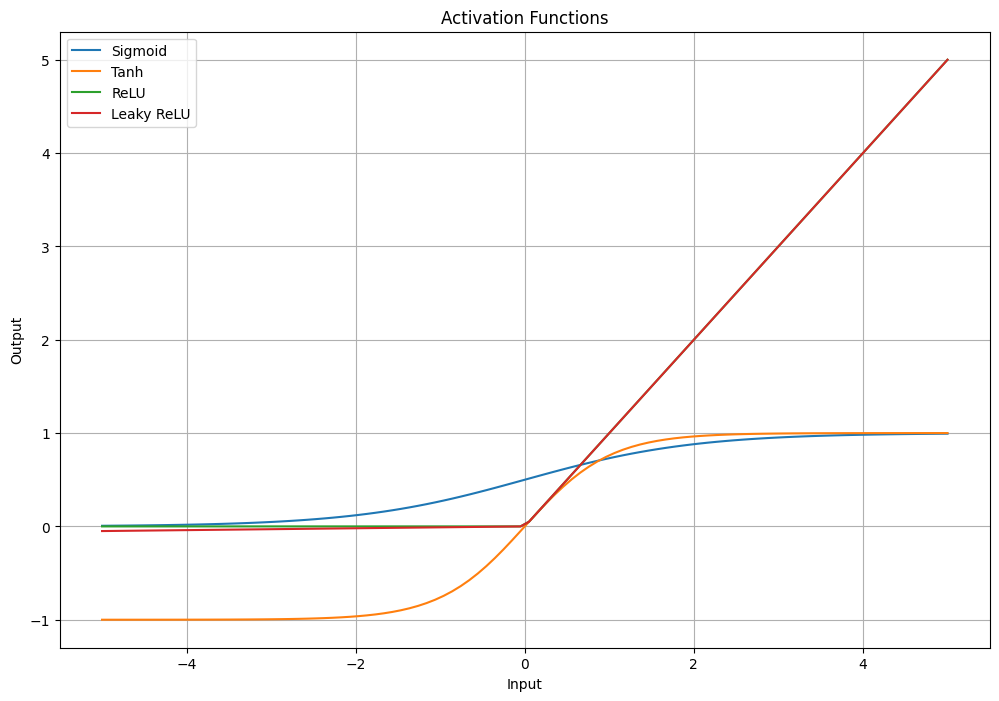

In [3]:
import matplotlib.pyplot as plt
import numpy as np

# Generate input values
x_values = np.linspace(-5, 5, 100)

# Calculate outputs for each activation function
sigmoid_output = sigmoid(x_values)
tanh_output = tanh(x_values)
relu_output = relu(x_values)
leaky_relu_output = leaky_relu(x_values)
# Softmax is not typically plotted in this way as it's a function of a vector

# Plot each activation function
plt.figure(figsize=(12, 8))

plt.plot(x_values, sigmoid_output, label='Sigmoid')
plt.plot(x_values, tanh_output, label='Tanh')
plt.plot(x_values, relu_output, label='ReLU')
plt.plot(x_values, leaky_relu_output, label='Leaky ReLU')

plt.title('Activation Functions')
plt.xlabel('Input')
plt.ylabel('Output')
plt.grid(True)
plt.legend()
plt.show()

**Explanation:**
The choice of activation function significantly impacts a neural network's ability to learn complex patterns. Non-linear activation functions are crucial for learning non-linear relationships in data, as linear functions would simply result in a linear transformation of the input regardless of the number of layers. Different activation functions have varying properties, such as their range, differentiability, and behavior around zero, which can influence the network's convergence speed, susceptibility to the vanishing or exploding gradient problem, and overall performance. For instance, ReLU and its variants are popular due to their computational efficiency and ability to mitigate vanishing gradients, while sigmoid and tanh can be useful in specific output layers or for certain types of data.
